Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Analysis

In [2]:
train = pd.read_csv("exoTrain.csv")

In [3]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
#Setting labels to zeroes and ones
train["LABEL"] = train["LABEL"].map({2:1, 1:0})
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [5]:
#Shuffling data
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0,-50.35,-66.63,-68.80,-54.23,-69.81,-67.13,-71.98,-69.96,-60.43,...,8.38,27.36,25.29,10.31,35.82,11.35,-28.85,-19.05,-37.08,-20.47
1,0,240.24,283.93,287.74,228.06,152.50,123.93,41.93,-19.32,-140.13,...,74.50,106.18,92.56,143.37,43.50,117.31,-51.94,-11.32,-108.82,-47.94
2,0,-87.50,-87.76,-97.47,-91.09,-97.38,-100.09,-102.11,-89.77,-96.90,...,-6.81,6.12,-14.55,-1.13,-7.86,-0.54,-10.02,5.50,-1.92,-12.09
3,0,30.90,46.44,43.62,38.04,37.06,20.63,28.65,19.60,30.34,...,-1.91,0.96,0.97,9.74,3.28,-1.19,4.06,2.86,-5.77,4.25
4,0,1439240.50,1453319.00,1468429.00,1495750.00,1510937.00,1508152.50,1465743.00,1416827.00,1342888.50,...,469144.50,514999.00,563276.00,587067.50,589078.50,583560.00,288607.50,215972.00,193191.00,185221.50


Data Visualization

In [6]:
# fig = plt.figure(figsize=(12,8))

# plt.plot(train[train["LABEL"] == 1].iloc[:, 1:], ls='solid', color='r')
# plt.plot(train[train["LABEL"] == 0].iloc[:, 1:], ls='solid', color='b')
# plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your training and test datasets
train = pd.read_csv('exoTrain.csv')
test = pd.read_csv('exoTest.csv')

# Separate labels and features
y = train.iloc[:, 0]
train = train.iloc[:, 1:]

# Initialize the Standard Scaler and fit it on the training data
scaler = StandardScaler()
scaler.fit(train)

# Transform both the training and test data
normalizedTrain = scaler.transform(train)
normalizedTest = scaler.transform(test.iloc[:, 1:])

# Convert the normalized data back to DataFrames
dfNormTrain = pd.DataFrame(normalizedTrain, columns=train.columns)
dfNormTest = pd.DataFrame(normalizedTest, columns=test.columns[1:])

# Add the labels back to the normalized DataFrames
dfNormTrain["LABEL"] = y.values
dfNormTest["LABEL"] = test.iloc[:, 0].values

# Convert labels from -1 to 0
dfNormTrain["LABEL"] = dfNormTrain["LABEL"].replace(1, 0)
dfNormTest["LABEL"] = dfNormTest["LABEL"].replace(1, 0)
dfNormTrain["LABEL"] = dfNormTrain["LABEL"].replace(2, 1)
dfNormTest["LABEL"] = dfNormTest["LABEL"].replace(2, 1)


# Save the normalized DataFrames to CSV files
dfNormTrain.to_csv("normExoTrain.csv", index=False)
dfNormTest.to_csv("normExoTest.csv", index=False)

# Display the first few rows of the normalized test DataFrame
print(dfNormTest.head())


     FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6    FLUX.7  \
0 -0.001145 -0.001302 -0.002769 -0.004834 -0.004767 -0.004463 -0.004071   
1  0.260042  0.255627  0.254212  0.249042  0.238612  0.227529  0.228245   
2  0.032550  0.031609  0.028430  0.023339  0.019468  0.014624  0.013420   
3 -0.045130 -0.043858 -0.045331 -0.044630 -0.039062 -0.038653 -0.037618   
4 -0.008560 -0.006628 -0.007133 -0.007310 -0.007464 -0.007095 -0.004878   

     FLUX.8    FLUX.9   FLUX.10  ...  FLUX.3189  FLUX.3190  FLUX.3191  \
0 -0.004694 -0.005528 -0.008396  ...  -0.013413  -0.015098  -0.015027   
1  0.238160  0.258152  0.273813  ...  -0.041665  -0.043729  -0.047127   
2  0.010847  0.004015  0.000483  ...  -0.015410  -0.016540  -0.016199   
3 -0.037591 -0.039591 -0.042256  ...  -0.011336  -0.013291  -0.013613   
4 -0.006972 -0.006083 -0.006512  ...  -0.015697  -0.016054  -0.015420   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  LABEL  
0  -0.013376  -0.011421   0.02952

In [8]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW

np.random.seed(42)

In [9]:
import random

class RandomTransforms:
    def __init__(self, transforms, probabilities):
        self.transforms = transforms
        self.probabilities = probabilities

    def __call__(self, x):
        for transform, probability in zip(self.transforms, self.probabilities):
            if random.random() < probability:
                x = transform(x)
        return x

In [10]:
class LightFluxDataset(Dataset):
    def __init__(self, path, transform = None) -> None:
        self.data = pd.read_csv(path)
        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        flux = self.data.iloc[index, 1:].values
        flux = torch.tensor(flux, dtype=torch.float32)

        label = self.data.iloc[index, -1]
        label = torch.tensor(label, dtype=torch.float32)

        if self.transform:
            flux = self.transform(flux)
            flux = flux.to(torch.float32)

        return flux, label

In [11]:
class exoLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(exoLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        self.dropout = nn.Dropout(0.5)

        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out)
        out = self.fc(out[:, -1, :])
        
        return out

In [12]:
device = torch.device("cuda")

In [13]:
def training(model, optimizer, train_loader, criterion, scaler, epoch):
    model.train()
    runningLoss = 0.
    for i, (flux, labels) in enumerate(train_loader):
        flux, labels = flux.to(device), labels.to(device)

        if flux.dim() == 2:
            flux = flux.unsqueeze(1)

        ouputs = model(flux).squeeze(1)
        loss = criterion(ouputs, labels)

        runningLoss += loss.item()

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        print(f'\r{" " * 80}', end="")
        print(f'\r Step [{i+1}/{len(train_loader)}], Loss: {(runningLoss/(i+1)):.4f}', end="")
    print(f'\r{" " * 80}', end="")
    print(f'\r Epoch [{epoch+1}], Loss: {(runningLoss/(i+1)):.4f}')

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

def evaluate(model, test_loader, criterion):
    model.eval()
    
    testLabels = []
    predictedLabels = []

    with torch.no_grad():
        runningLoss = 0
        total_acc = 0
        total_pred = 0

        for batch in test_loader:
            flux, labels = batch
            flux, labels = flux.to(device), labels.to(device)

            if flux.dim() == 2:
                flux = flux.unsqueeze(1)

            outputs = model(flux).squeeze(1)

            loss = criterion(outputs, labels)
            runningLoss += loss.item()

            # Apply threshold to get binary predictions
            predictions = (outputs > 0).float()
            total_acc += (predictions == labels).sum().item()
            total_pred += labels.size(0)

            predictedLabels.extend(predictions.to("cpu").tolist())
            testLabels.extend(labels.to("cpu").tolist())

    testLabels = np.array(testLabels)
    predictedLabels = np.array(predictedLabels)

    roc_auc = roc_auc_score(testLabels, predictedLabels)

    print(f" Test Loss: {(runningLoss / len(test_loader)):.4f}, Total Accuracy: {(total_acc/total_pred):.4f}, ROC Curve: {roc_auc:.3f}")

In [15]:
def scaling(data, sigma=0.1):
    factor = np.random.normal(loc=1.0, scale=sigma, size=data.shape)
    scaled_data = data * factor
    return np.clip(scaled_data, 0, 1)

augmentations = [scaling]
probabilities = [0.05, 0.1]

transformations = RandomTransforms(augmentations, probabilities)

train = LightFluxDataset("normExoTrain.csv", transform=transformations)
test = LightFluxDataset("normExoTest.csv")

trainLoader = DataLoader(train, batch_size=8, shuffle=True)
testLoader = DataLoader(test, batch_size=8, shuffle=True)

In [16]:
# Read the CSV file
df = pd.read_csv("normExoTrain.csv")

# Extract the "LABEL" column
labels = df["LABEL"]

# Convert labels to a PyTorch tensor
labels_tensor = torch.tensor(labels.values, dtype=torch.float32)

# Calculate class counts
class_counts = torch.bincount(labels_tensor.long())

# Calculate positive weight
pos_weight = class_counts[0].float() / class_counts[1].float()

# Clean up
del df, labels, labels_tensor

In [17]:
from torch.cuda.amp import GradScaler

scaler = GradScaler()

model = exoLSTM(3197, 16, 1, 1)
model = model.to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight]).to(device))
optimizer = AdamW(model.parameters(), lr = 0.0001)

In [18]:
print(f"Total Training Batches: {len(trainLoader)}")
print(f"Total Testing Batches: {len(testLoader)}")

Total Training Batches: 636
Total Testing Batches: 72


In [19]:
for epoch in range(25):
    training(model, optimizer, trainLoader, criterion, scaler, epoch)
    evaluate(model, testLoader, criterion)

 Epoch [1], Loss: 1.3782                                                        
 Test Loss: 1.5244, Total Accuracy: 0.9860, ROC Curve: 0.497
 Epoch [2], Loss: 1.3592                                                        
 Test Loss: 1.5126, Total Accuracy: 0.9842, ROC Curve: 0.496
 Epoch [3], Loss: 1.3529                                                        
 Test Loss: 1.5008, Total Accuracy: 0.9860, ROC Curve: 0.497
 Epoch [4], Loss: 1.3350                                                        
 Test Loss: 1.4878, Total Accuracy: 0.9860, ROC Curve: 0.497
 Epoch [5], Loss: 1.3182                                                        
 Test Loss: 1.4775, Total Accuracy: 0.9877, ROC Curve: 0.498
 Epoch [6], Loss: 1.2962                                                        
 Test Loss: 1.4626, Total Accuracy: 0.9842, ROC Curve: 0.496
 Epoch [7], Loss: 1.2876                                                        
 Test Loss: 1.4489, Total Accuracy: 0.9825, ROC Curve: 0.496
 Epoch

In [20]:
testLabels = []
predictedLabels = []

with torch.no_grad():
    runningLoss = 0
    total_acc = 0
    total_pred = 0

    for batch in testLoader:
        flux, labels = batch
        flux, labels = flux.to(device), labels.to(device)

        if flux.dim() == 2:
            flux = flux.unsqueeze(1)

        outputs = model(flux).squeeze(1)

        # Apply threshold to get binary predictions
        predictions = (outputs > 0).float()
        
        predictedLabels.extend(predictions.to("cpu").tolist())
        testLabels.extend(labels.to("cpu").tolist())

        total_acc += (predictions == labels).sum().item()
        total_pred += labels.size(0)

print(f"Total Accuracy: {total_acc / total_pred}")

from collections import Counter

# Check class distribution in test labels
print("Test Labels Distribution:", Counter(testLabels))

# Check class distribution in predicted labels
print("Predicted Labels Distribution:", Counter(predictedLabels))


Total Accuracy: 0.980701754385965
Test Labels Distribution: Counter({0.0: 565, 1.0: 5})
Predicted Labels Distribution: Counter({0.0: 554, 1.0: 16})


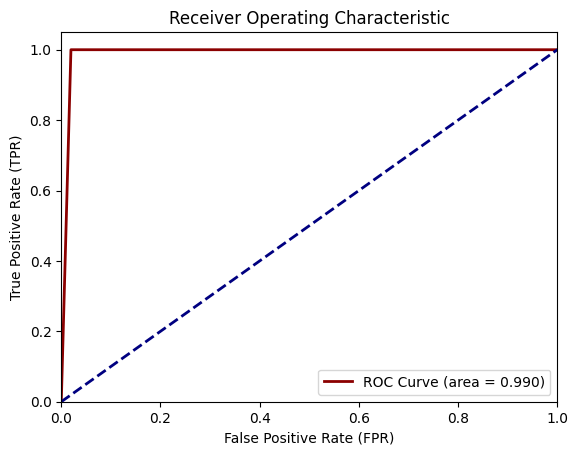

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

testLabels = np.array(testLabels)
predictedLabels = np.array(predictedLabels)

fpr, tpr, thresholds = roc_curve(testLabels, predictedLabels)
roc_auc = roc_auc_score(testLabels, predictedLabels)

plt.figure()
plt.plot(fpr, tpr, color="darkred", lw=2, label=f"ROC Curve (area = {roc_auc:0.3f})")
plt.plot([0, 1], [0, 1], color = "navy", lw=2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [24]:
torch.save(model.state_dict(), "model.pt")